### Confusion Matrix – Comparative Examples

<div style="font-size:20px">
Here we compare three different scenarios to see how the values inside the confusion matrix affect Accuracy, Precision, Recall and F1 Score.
</div>


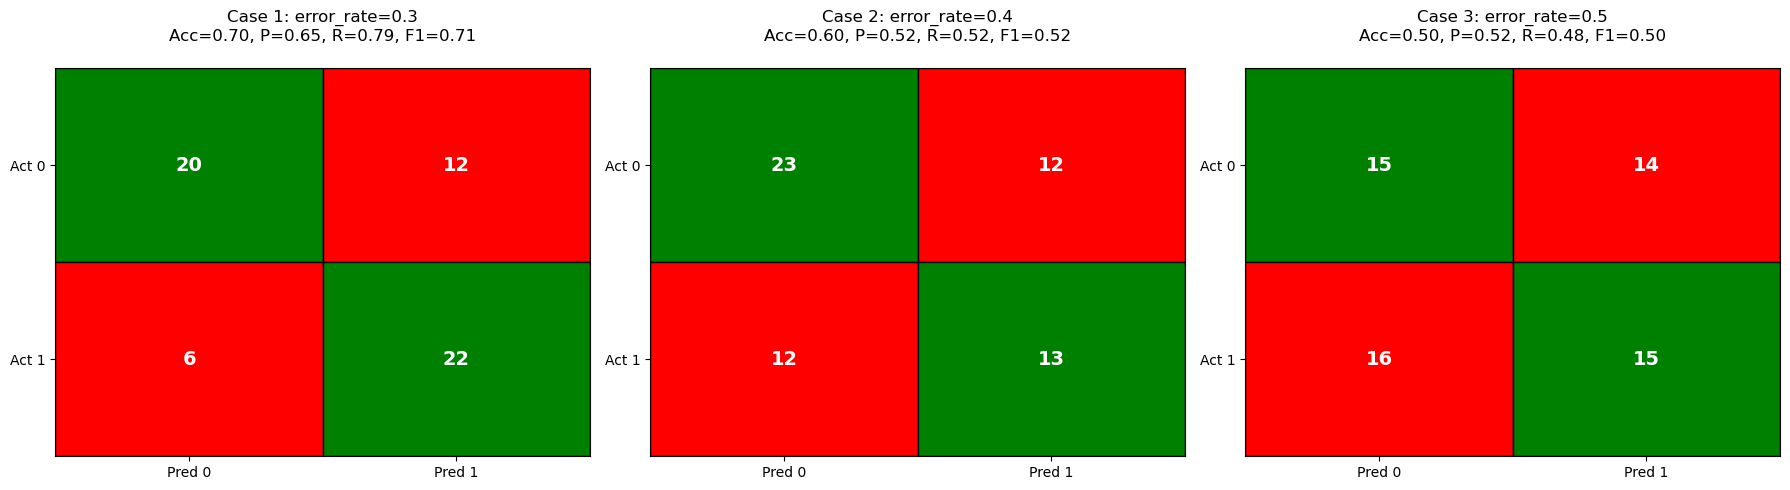

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

np.random.seed(42)  

def generate_case(n=50, p_pos=0.5, error_rate=0.3):
  
    y_true = np.random.choice([0, 1], size=n, p=[1-p_pos, p_pos])
    
   
    y_pred = y_true.copy()
    flip_idx = np.random.choice(n, size=int(error_rate*n), replace=False)
    y_pred[flip_idx] = 1 - y_pred[flip_idx]
    
    return y_true, y_pred

cases = {
    "Case 1: error_rate=0.3": generate_case(n=60, p_pos=0.5, error_rate=0.3),
    "Case 2: error_rate=0.4": generate_case(n=60, p_pos=0.5, error_rate=0.4),
    "Case 3: error_rate=0.5": generate_case(n=60, p_pos=0.5, error_rate=0.5),
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (title, (y_true, y_pred)) in zip(axes, cases.items()):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    colors = np.array([["green", "red"],
                       ["red", "green"]])
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.add_patch(plt.Rectangle((j, i), 1, 1,
                                       facecolor=colors[i, j],
                                       edgecolor="black"))
            ax.text(j + 0.5, i + 0.5, cm[i, j],
                    ha="center", va="center", fontsize=14,
                    color="white", weight="bold")
    
    ax.set_xticks(np.arange(2) + 0.5)
    ax.set_yticks(np.arange(2) + 0.5)
    ax.set_xticklabels(["Pred 0", "Pred 1"])
    ax.set_yticklabels(["Act 0", "Act 1"])
    ax.set_xlim(0, 2)
    ax.set_ylim(2, 0)
    ax.set_title(f"{title}\nAcc={acc:.2f}, P={prec:.2f}, R={rec:.2f}, F1={f1:.2f}", pad=20)

plt.tight_layout()
plt.show()
